In [1]:
from flask import Flask, request
from flask_restful import Resource, Api

import utils 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import rasterio
import numpy as np
from flask import jsonify


In [2]:
app = Flask(__name__)
api = Api(app)

# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

In [3]:
#grab sat image
#theres a list of 12 of them at https://20tree-public.s3-eu-west-1.amazonaws.com/candidates/cloudmask/tif_tiles.txt
sat_tile = 'Sentinel2L2A_sen2cor_18TUR_20180812_clouds=5.3%_area=99%.tif'

crop = (5000,5000,512,512)
#NOTE were only reading first rgb bands here
#for model predictions we skip the band
#argument to load all 10 bands
image, meta = utils.tif_to_image(sat_tile, crop=crop, bands=[3,2,1])
#meta needed if we want to save the image
with rasterio.open("test.tif", 'w', **meta) as dst:
    dst.write(image)

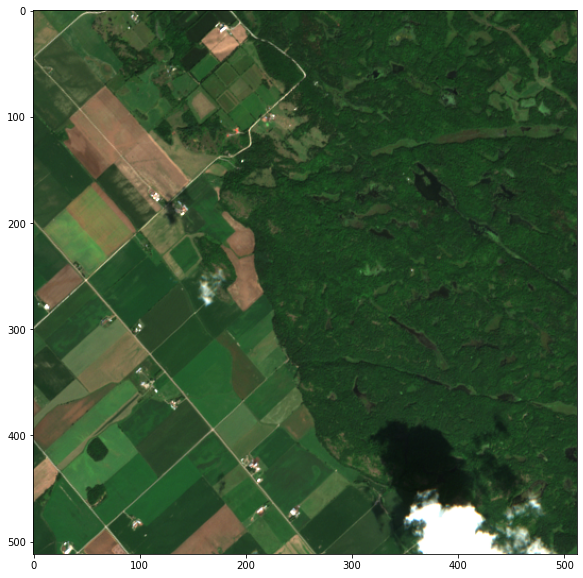

In [6]:
#show it
fig = plt.figure(figsize=(10,10))
img = rasterio.open("test.tif").read()
img = np.clip(img, 0, 2000)/2000.0
plt.imshow(np.transpose(img, (1,2,0)))

(10, 512, 512)


/home/leke/Downloads/Overstory/utils.py:225: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/leke/Downloads/Overstory/utils.py:226: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


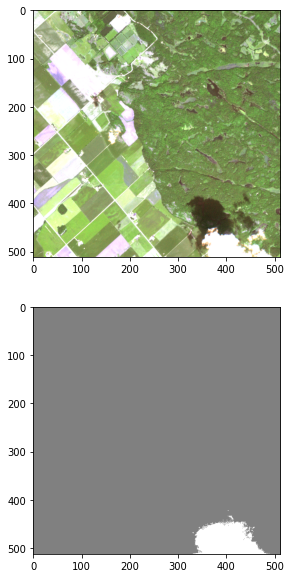

In [7]:
plt.rcParams["figure.figsize"] = (10,10)

#meta needed if we want to save the image
image,meta = utils.tif_to_image(sat_tile, crop=crop) #NOTE no band arg = we load all bands

with rasterio.open("test.tif", 'w', **meta) as dst:
    dst.write(image)

# NOTE: if you have the model stored somewhere else, 
# change the location in utils.infer_image()
res = utils.infer_image(file_path='test.tif', plot=True) #x and y starting point at 5000, were always taking a 512x512 crop

In [8]:
res.shape, res

((512, 512),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))